##############################################################
# BG-NBD ve Gamma-Gamma ile CLTV Prediction
##############################################################


In [42]:
import pandas as pd
# 读取数据
df = pd.read_csv('../data1.csv',encoding='utf-8')
df_ = df.copy()
df_.head()

,platform_open_id,goods_num,price,is_member,discount_fee,outer_id,take_at,status,payment,member_id,order_payment,total_fee,goods_id
0,101ZX1xyfG/omvnxQPYI8YPFhoi2hfl26RoAPgzb9VqwG0=,1,3650.0,0,300.0,302945-01,2020-01-01 01:35:43,6,3350.0,0,3350.0,3350.0,520399672992
1,爱012Pr5yntLUcTKU0MtsjPGOs2DEMds1FAQI7fgfrP3PMg=,1,2690.0,0,600.0,227605-01,2020-01-01 08:55:17,6,2090.0,0,2090.0,2090.0,548452717637
2,朱01i4Rmip4x6V5VS/UZPBzc+Nnn6lnZ7cacExIx+8aylCY=,1,3990.0,1,400.0,226403-01,2020-01-01 09:48:35,6,3590.0,616297,3590.0,3590.0,564779472639
3,001bRbDk61o6cYW1XuaH8XgLgKHM0CMIQafAKaTQc17qGM=,1,3290.0,0,0.0,NaN,2020-01-01 09:56:04,6,3290.0,0,3290.0,3290.0,609664493135
4,t014Au7WHWPPI0OeT5DX13SQ5q8qGekDqre2uZnHtcQpY8=,1,3590.0,1,500.0,282846-01,2020-01-01 10:36:50,6,3090.0,220404,3090.0,3090.0,589083659427


In [43]:
import numpy as np
a='234'
c='56'
a=a+c
b='23456'
print(np.all(a==b))

True


### 简单看了一下这些数据都是价格为0，没有用户ID，是什么数据无法推断，这些数据要弃去

In [44]:
df_ = df_[['platform_open_id','status','payment','take_at']]
df_=df_[df_['status']==6]
df_=df_[df_['payment']>10]
df_['Invoice']= df_.index
date1 = df_['take_at'].str.split(' ').str[0]
time_1 = date1.str.split('-').str[0]+date1.str.split('-').str[1]+date1.str.split('-').str[2]
df_['year-month-day'] = time_1
df_

,platform_open_id,status,payment,take_at,Invoice,year-month-day
0,101ZX1xyfG/omvnxQPYI8YPFhoi2hfl26RoAPgzb9VqwG0=,6,3350.0,2020-01-01 01:35:43,0,20200101
1,爱012Pr5yntLUcTKU0MtsjPGOs2DEMds1FAQI7fgfrP3PMg=,6,2090.0,2020-01-01 08:55:17,1,20200101
2,朱01i4Rmip4x6V5VS/UZPBzc+Nnn6lnZ7cacExIx+8aylCY=,6,3590.0,2020-01-01 09:48:35,2,20200101
3,001bRbDk61o6cYW1XuaH8XgLgKHM0CMIQafAKaTQc17qGM=,6,3290.0,2020-01-01 09:56:04,3,20200101
4,t014Au7WHWPPI0OeT5DX13SQ5q8qGekDqre2uZnHtcQpY8=,6,3090.0,2020-01-01 10:36:50,4,20200101
...,...,...,...,...,...,...
2076736,n01InRhxxuOhWe4BzurCg5ladnn6lnZ7cacExIx+8aylCY=,6,100.0,2021-06-26 11:02:07,2076736,20210626
2076739,p014nKE7F9VesBvrOcH9wtHE2dHwSigfMMQPj0dkBAC8Vk=,6,2990.0,2021-06-26 23:59:02,2076739,20210626
2076745,丹012kb+XmIwcJ9PSqOBWY8vwtnn6lnZ7cacExIx+8aylCY=,6,3790.0,2021-06-28 18:43:34,2076745,20210628
2076747,y0185UIrrcxFSaqgoR0BIGAJgKHM0CMIQafAKaTQc17qGM=,6,2990.0,2021-06-29 08:40:37,2076747,20210629


In [45]:
# 验证下面frequency是指购买商品的天数t01MBW9zURdD5m6eQ83INBdXZq8qGekDqre2uZnHtcQpY8=

df_['year-month-day']=pd.to_datetime(df_['year-month-day'])
test =df_[(df_['year-month-day'] >=pd.to_datetime('20210101')) & (df_['year-month-day'] <= pd.to_datetime('20210630'))]
df_2 = test[test['platform_open_id']=='h01Vi4HXwDYGN3gmT3aqIrVoAKHM0CMIQafAKaTQc17qGM=']
# df_2 = df_[df_['platform_open_id']=='t01MBW9zURdD5m6eQ83INBdXZq8qGekDqre2uZnHtcQpY8=']
df_2['date'] = df_2['take_at'].str.split(' ').str[0]
len(list(set(list(df_2['date']))))

53

In [5]:
# pd.set_option('mode.chained_assignment', None)
# df_["int_date"] = pd.to_numeric(df_["int_date"])
# df_.sort_values("int_date",inplace=True)
# 检查缺失值
print(df_.isna().sum())
# 弃去缺失值
df_.dropna(inplace=True)
print(df_.isna().sum())


platform_open_id    45
status               0
payment              0
take_at              0
Invoice              0
year-month-day       0
dtype: int64
platform_open_id    0
status              0
payment             0
take_at             0
Invoice             0
year-month-day      0
dtype: int64


In [6]:
#数据中包含共?订单，?个用户
df_.rename(columns={'platform_open_id':'Customer ID', 'payment': 'Sales','take_at':'InvoiceDate'}, inplace=True)
df_ = df_[['Invoice','Customer ID','InvoiceDate','Sales']]
# ### 更改用户ID类型
df_['Customer ID'] = df_['Customer ID'].astype('object')
df_['Invoice'] = df_['Invoice'].astype('object')
df_['InvoiceDate']=pd.to_datetime(df_['InvoiceDate'])
# df_.nunique()
df_

C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Administrator\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Invoice,Customer ID,InvoiceDate,Sales
0,0,101ZX1xyfG/omvnxQPYI8YPFhoi2hfl26RoAPgzb9VqwG0=,2020-01-01 01:35:43,3350.0
1,1,爱012Pr5yntLUcTKU0MtsjPGOs2DEMds1FAQI7fgfrP3PMg=,2020-01-01 08:55:17,2090.0
2,2,朱01i4Rmip4x6V5VS/UZPBzc+Nnn6lnZ7cacExIx+8aylCY=,2020-01-01 09:48:35,3590.0
3,3,001bRbDk61o6cYW1XuaH8XgLgKHM0CMIQafAKaTQc17qGM=,2020-01-01 09:56:04,3290.0
4,4,t014Au7WHWPPI0OeT5DX13SQ5q8qGekDqre2uZnHtcQpY8=,2020-01-01 10:36:50,3090.0
...,...,...,...,...
2076736,2076736,n01InRhxxuOhWe4BzurCg5ladnn6lnZ7cacExIx+8aylCY=,2021-06-26 11:02:07,100.0
2076739,2076739,p014nKE7F9VesBvrOcH9wtHE2dHwSigfMMQPj0dkBAC8Vk=,2021-06-26 23:59:02,2990.0
2076745,2076745,丹012kb+XmIwcJ9PSqOBWY8vwtnn6lnZ7cacExIx+8aylCY=,2021-06-28 18:43:34,3790.0
2076747,2076747,y0185UIrrcxFSaqgoR0BIGAJgKHM0CMIQafAKaTQc17qGM=,2021-06-29 08:40:37,2990.0


In [7]:
# 看订单状态
from collections import Counter
df_1 = df_.groupby('Customer ID')['Customer ID'].count()
Counter(df_1)

Counter({1: 858194,
         2: 78227,
         3: 12116,
         5: 875,
         4: 2997,
         6: 376,
         9: 49,
         7: 137,
         8: 81,
         21: 2,
         10: 34,
         14: 7,
         11: 16,
         13: 7,
         31: 2,
         20: 3,
         12: 11,
         130: 1,
         19: 2,
         15: 2,
         42: 1,
         78: 1,
         23: 2})

In [8]:
df_.info()
print('总人数:',len(list(set(list(df_['Customer ID'])))))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073028 entries, 0 to 2076754
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1073028 non-null  object        
 1   Customer ID  1073028 non-null  object        
 2   InvoiceDate  1073028 non-null  datetime64[ns]
 3   Sales        1073028 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 40.9+ MB
总人数: 953143


### CLV建模探索

In [32]:
#频率为0说明只有一次购买。频率分布情况
from lifetimes.utils import summary_data_from_transaction_data
data = summary_data_from_transaction_data(df_, customer_id_col='Customer ID', datetime_col='InvoiceDate',
                         monetary_value_col='Sales',
                         observation_period_end='2020-12-31')
print(len(data))
data.sort_values('monetary_value').head()

665791


,frequency,recency,T,monetary_value
Customer ID,,,,
-01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=,0.0,0.0,301.0,0.0
多01dxm8JhKkAsJEEUO3FrkWJQKHM0CMIQafAKaTQc17qGM=,0.0,0.0,50.0,0.0
多01e1V6STnanX17iAejVYK+hhoi2hfl26RoAPgzb9VqwG0=,0.0,0.0,50.0,0.0
多01eF6zSTPgqPKn7KJwfR4anq3Y2wWCx2gxb9BRyrBfqBc=,0.0,0.0,94.0,0.0
多01ePcE5JV9obplUzckHDczoQKHM0CMIQafAKaTQc17qGM=,0.0,0.0,116.0,0.0


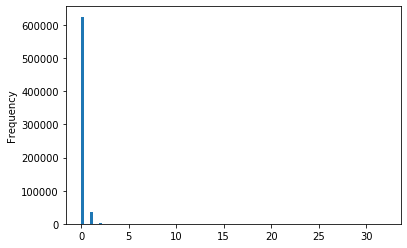

In [33]:
data['frequency'].plot(kind='hist', bins=100)

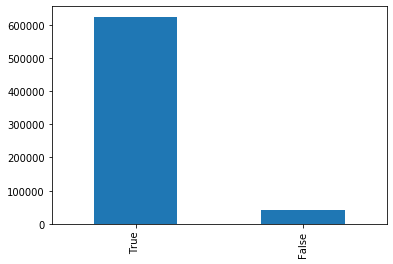

In [34]:
# 说在周期内只消费过一次比例
(data.frequency == 0).value_counts().plot.bar()

In [35]:
print(sum(data['frequency'] == 0))
sum(data['frequency'] == 0)/float(len(data))

625108


0.9388952388962902

### 使用BetaGeoFitter模型进行频率/新近度分析

In [36]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data['frequency'], data['recency'], data['T'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 665791 subjects, a: 3.57, alpha: 30.21, b: 0.94, r: 0.04>


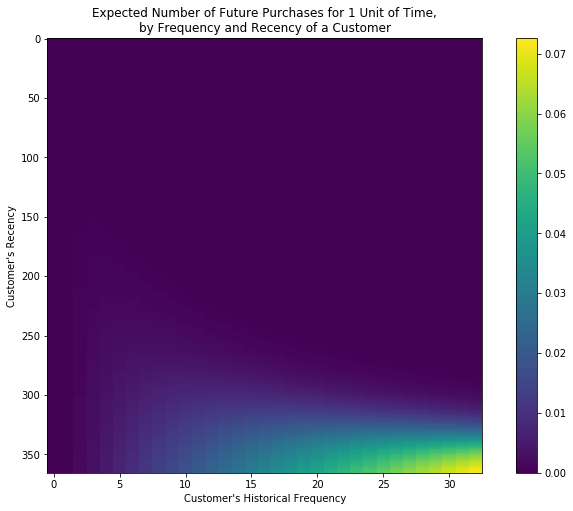

In [37]:
from lifetimes.plotting import plot_frequency_recency_matrix
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
plot_frequency_recency_matrix(bgf)

### 右下角的数据80/500，该用户进行了80天购买，并且他最近购买时间大约是500天（她的第一笔交易和她最近的交易之间的时间间隔），那么她属于最有价值客户，依照其消费惯性，将来也会进行多笔交易,右上角黑了的部分可能是已经失去,类似的客户20/500这样的数据，代表客户不经常来，最近没有见过他，所以他可能再次购买,最近购买的顾客应该还“活着”

### 黄色部分为还在用户，深色部分为丢失用户。我们将客户从“下一期最高预期购买量”排名降至最低。模型公开了一种方法，该方法将使用其历史记录预测下一时期客户的预期购买量：

In [38]:
# t是时间 t为1是指接下来1天最后价值客户购买的概率以及其他信息
t = 181
data['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, 
                                  data['frequency'], data['recency'], data['T'])
#下面列出的是我们的前五大客户，模型的predict_purchases列给出了购买量的预测
data.sort_values(by='predicted_purchases', ascending=False).head()


,frequency,recency,T,monetary_value,predicted_purchases
Customer ID,,,,,
h01Vi4HXwDYGN3gmT3aqIrVoAKHM0CMIQafAKaTQc17qGM=,32.0,111.0,113.0,334.375000,10.089023
t01MBW9zURdD5m6eQ83INBdXZq8qGekDqre2uZnHtcQpY8=,14.0,111.0,120.0,8118.571429,3.476879
t01qH6ONLWIW7MshhLEgY/+7GUH0gnChQvUNmmkJYYrR2c=,13.0,330.0,341.0,5240.769231,2.576009
k012U/nYBWKJoo20rvmpNm3ugKHM0CMIQafAKaTQc17qGM=,9.0,339.0,347.0,6465.555556,1.739348
小01X/PDVhCqaS+tHQrmK39Jw9nn6lnZ7cacExIx+8aylCY=,8.0,300.0,306.0,8123.750000,1.633563


### Recency（ [公式] ） - 顾客第一次购买和最后一次购买的时间差    Frequency（ [公式] ）- 顾客重复购买的天/月/季度数（取决与不同的产业，时间单位可以是月份，季度或者年数）   Monetary - 顾客平均每天/月/季的消费额（时间单位需与Frequency保持一致）  T - 顾客第一次购买与整个分析截止时间（所有顾客交易日期的最大值）的时间差   	predicted_purchases下一期最高预期购买量

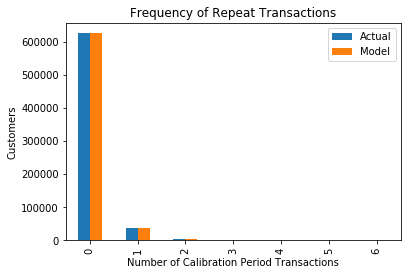

In [39]:
from lifetimes.plotting import plot_period_transactions
#如果结果相近，模型的预测那就不错
plot_period_transactions(bgf)

### 分数据集进行预测现在将数据集划分为校准周期数据集和保持数据集。这很重要，因为我们想要测试我们的模型如何对尚未看到的数据执行（就像机器学习实践中的交叉验证一样）

In [26]:
from lifetimes.utils import calibration_and_holdout_data
summary_cal_holdout = calibration_and_holdout_data(df_, 'Customer ID', 'InvoiceDate',
                                        calibration_period_end='2020-12-31',
                                        observation_period_end='2021-06-30' )   
summary_cal_holdout.sort_values(by='frequency_holdout', ascending=False).head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Customer ID,,,,,
h01Vi4HXwDYGN3gmT3aqIrVoAKHM0CMIQafAKaTQc17qGM=,32.0,111.0,113.0,53.0,181.0
t01MBW9zURdD5m6eQ83INBdXZq8qGekDqre2uZnHtcQpY8=,14.0,111.0,120.0,23.0,181.0
e01YMW9AZyDKCXVFYaid6/HZGdHwSigfMMQPj0dkBAC8Vk=,12.0,79.0,122.0,11.0,181.0
p01G934keK4kmOfxWUs0JkFmdnn6lnZ7cacExIx+8aylCY=,0.0,0.0,97.0,11.0,181.0
201nFTjD1BLd7Ibim1hQqL9ImnGZ/iAydcz/+qq7i1UY74=,1.0,17.0,19.0,7.0,181.0


In [49]:
t=181
summary_cal_holdout['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, 
                                  summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
#下面列出的是我们的前五大客户，模型的predict_purchases列给出了购买量的预测
summary_cal_holdout.sort_values(by='predicted_purchases', ascending=False).head()


,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout,predicted_purchases
Customer ID,,,,,,
h01Vi4HXwDYGN3gmT3aqIrVoAKHM0CMIQafAKaTQc17qGM=,32.0,111.0,113.0,53.0,181.0,9.930182
t01MBW9zURdD5m6eQ83INBdXZq8qGekDqre2uZnHtcQpY8=,14.0,111.0,120.0,23.0,181.0,3.414684
t01qH6ONLWIW7MshhLEgY/+7GUH0gnChQvUNmmkJYYrR2c=,13.0,330.0,341.0,3.0,181.0,2.548816
k012U/nYBWKJoo20rvmpNm3ugKHM0CMIQafAKaTQc17qGM=,9.0,339.0,347.0,2.0,181.0,1.721845
小01X/PDVhCqaS+tHQrmK39Jw9nn6lnZ7cacExIx+8aylCY=,8.0,300.0,306.0,0.0,181.0,1.616583


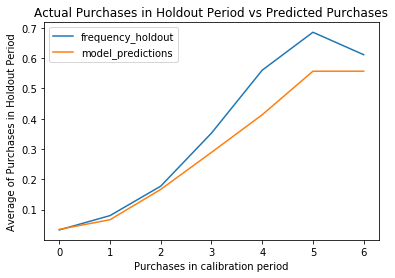

In [47]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

### 样本期间从开始到2020-12-31; 验证期从2021-01-01到2021-06-30。该图通过重复购买次数（x轴）对校准期内的所有客户进行分组，然后在保持期（y轴）中对其重复购买进行平均。橙线和蓝线分别表示模型预测和y轴的实际结果。正如我们所看到的，我们的模型能够非常准确地预测出样本中客户群的行为，模型低估了3次购买后。

In [48]:
###### import numpy as np
def score_model(actuals, predicted, metric='mse'):
    # make sure metric name is lower case
    metric = metric.lower()
    # Mean Squared Error and Root Mean Squared Error
    if metric == 'mse' or metric == 'rmse':
        val = np.sum(np.square(actuals - predicted)) / actuals.shape[0]
        if metric == 'rmse':
            val = np.sqrt(val)
    # Mean Absolute Error
    elif metric == 'mae':
         val = np.sum(np.abs(actuals - predicted)) / actuals.shape[0]
    else:
        val = None
    return val
predicted_freq = bgf.predict(summary_cal_holdout['duration_holdout'], # Tahmin için gün sayısı
                        summary_cal_holdout['frequency_cal'],
                       summary_cal_holdout['recency_cal'],
                        summary_cal_holdout['T_cal'])
print(predicted_freq[:10])
print(predicted_freq['t01MBW9zURdD5m6eQ83INBdXZq8qGekDqre2uZnHtcQpY8='])
print(summary_cal_holdout.loc['t01MBW9zURdD5m6eQ83INBdXZq8qGekDqre2uZnHtcQpY8=']["frequency_holdout"])
print('MSE: {0}'.format(score_model(summary_cal_holdout["frequency_holdout"], predicted_freq, 'mse')))

Customer ID
-01CXQpmEM5354W1E9Y5jysHWdHwSigfMMQPj0dkBAC8Vk=    0.017438
-01ImFkgFq2wilGM2aDBAs09g==                        0.048465
.019lblZS71SIXRrbKbX8gH0c16em85Fa0GBxDkCy7kcI8=    0.046699
.01MPyjo2BxsrZa0sIQyVnAOM2DEMds1FAQI7fgfrP3PMg=    0.067042
001+0c99ohoK2zGa6v1PyAVrM2DEMds1FAQI7fgfrP3PMg=    0.016363
001+413KeLS8Gxq5O5Av3E4z816em85Fa0GBxDkCy7kcI8=    0.042693
001+CmZfQZPCRLCNfYYoA1CcAKHM0CMIQafAKaTQc17qGM=    0.017798
001+CnaWn0A4O7XzvaVFNKKxNnn6lnZ7cacExIx+8aylCY=    0.028197
001+H2O0WXvGq8LSahqfr52M816em85Fa0GBxDkCy7kcI8=    0.046030
001+JkRLrEEJjoZzP4uf5nl9QKHM0CMIQafAKaTQc17qGM=    0.046030
dtype: float64
3.414684320230232
23.0
MSE: 0.04640168856667705


### 客户交易预测:根据客户历史记录，我们现在可以预测个人未来的购买情况：

In [21]:
# 预测't01MBW9zURdD5m6eQ83INBdXZq8qGekDqre2uZnHtcQpY8='用户未来10天内购买商品量(最忠诚客户)
t = 10
individual = summary_cal_holdout.loc['t01MBW9zURdD5m6eQ83INBdXZq8qGekDqre2uZnHtcQpY8=']
bgf.predict(t, individual['frequency_cal'], individual['recency_cal'], individual['T_cal'])

0.5261878466568949

### 客户概率历史根据客户交易历史记录，我们可以根据我们训练的模型计算其存活的历史概率。例如，我们想看看我们最好的客户的交易历史，看看活着的可能性：

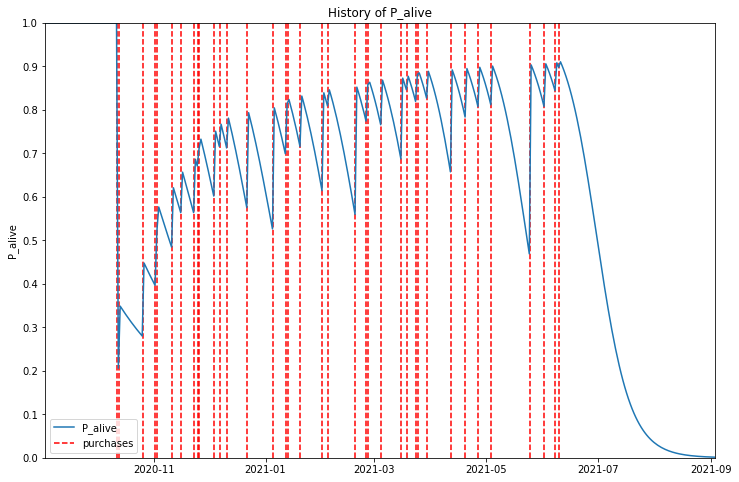

In [22]:
from lifetimes.plotting import plot_history_alive
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
id = 't01MBW9zURdD5m6eQ83INBdXZq8qGekDqre2uZnHtcQpY8='
days_since_birth = 365
sp_trans = df_.loc[df_['Customer ID'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate')
#  我们最好的客户't01MBW9zURdD5m6eQ83INBdXZq8qGekDqre2uZnHtcQpY8=' 是否还活着分析

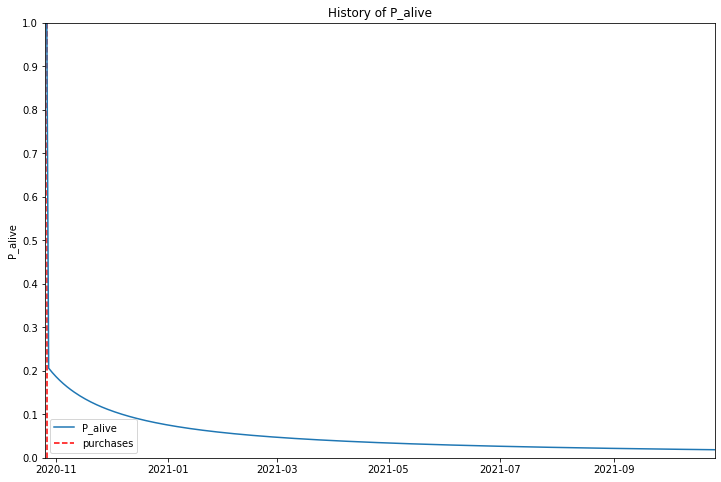

In [23]:
fig = plt.figure(figsize=(12,8))
id = '.01MPyjo2BxsrZa0sIQyVnAOM2DEMds1FAQI7fgfrP3PMg='
days_since_birth = 365
sp_trans = df_.loc[df_['Customer ID'] == id]
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate')

### 这位顾客来的频率不是很高但是分布还算均匀，最近也有消费，是‘活着’的用户

### gamma-gamma模型估算客户终生价值我们仅估算至少有一次重复购买的客户  训练Gamma-Gamma模型，并预测平均交易价值

In [24]:
# frequency>0 购买天数大于1的个数
returning_customers_summary = data[data['frequency']>0]
print(f'不止一天购买人数-----{returning_customers_summary.shape[0]}')

# 模型训练
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])

# 这样我们可以估算每个客户的平均交易价值
df_2= ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']
    )
max(list(df_2))

不止一天购买人数-----70618


4372.019968987497